In [2]:
# Importo i pacchetti necessari
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as mt
#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from scipy.optimize import curve_fit
from scipy.stats import chi2
from matplotlib2tikz import save as tikz_save

# Importo i dati in csv
Z1_0 = pd.read_csv('dati_plus.csv')
Z1_1 = pd.read_csv('dati_tot.csv')
M1 = pd.read_csv('dati_masse.csv')
T1 = pd.read_csv('dati_osc.csv')

# Porto le misure in metri
Z1_0 = Z1_0 * 1e-2
Z1_1 = Z1_1 * 1e-2

# Definisco le funzioni che mi servono
def mychisq(exp, obs, obsErr):
    return sum(np.power((exp - obs),2)/np.power(obsErr,2))

# Imposto le costanti e le risoluzioni di misura
g = 9.8071
Dmass = 1e-4 # Espresso in kg
Dtime = 1e-2 # Espresso in sec
Dlength = 5e-4 # Espresso in m, riferito all'asta millimetrata

Ho importato nel DataFrame `Z1_0` le misure di Valeria e Sho iniziali di allungamento (dopo poi si fa la media e l'errore sulla media si calcola come $\frac{1}{\sqrt{2}} \sigma^*[z_i]$). Nel DF `Z1_1` ho importato i dati delle misure statiche di allungamento e in `M1` ho due colonne, ovvero il set delle masse e il set delle masse con piattello.

Voglio plottare i dati con il peso sulle ascisse e gli allungamenti sulle ordinate; inoltre voglio trovare il chi quadro del fit rispetto ai dati.

In [3]:
# Metto i dati delle masse e li porto in chilogrammi
m1 = M1['m1'].values * 1e-3
m2 = M1['m2'].values * 1e-3
dmass = Dmass/np.sqrt(12)
p1 = m1 * g
dweight = dmass * g

# Calcolo le medie dei valori iniziali
Z1_0avg = Z1_0.mean(axis=1)
Z1_0var = Z1_0.var(axis=1)
Z1_0err = np.sqrt(1/np.size(Z1_0avg)*Z1_0var + (Dlength/np.sqrt(12)))
#display(Z1_0avg)
#display(Z1_0err)

# Calcolo le medie delle seconde misure
Z1_1avg = Z1_1.mean()
Z1_1var = Z1_1.var()
Z1_1err = np.sqrt(1/np.size(Z1_1avg)*Z1_1var + np.power(Dlength/np.sqrt(12),2))
#display(Z1_1avg)
#display(Z1_1var)
#display(Z1_1err)

# Mostro i dati di delle misure prima e dopo
for i in range(0, 11):
    print('Prima risulta zi%i = ( %.2f +- %.2f ) m, dopo invece z%i = ( %.4f +- %.4f ) m' % (i, Z1_0avg.values[i], Z1_0err.values[i], i, Z1_1avg.values[i], Z1_1err.values[i]))

zcfr1 = pd.DataFrame([Z1_0avg.values, Z1_0err.values])
zcfr2 = pd.DataFrame([Z1_1avg.values, Z1_1err.values])
zcfr1=zcfr1.round(2)
zcfr2=zcfr2.round(4)

#with open('tablecfr1.tex','w') as tf:
#    tf.write(zcfr1.to_latex())
#with open('tablecfr2.tex','w') as tf:
#    tf.write(zcfr2.to_latex())

# Calcolo gli allungamenti delle seconde misure
# ATTENZIONE! I DELTA HANNO 10 ELEMENTI NON 11! Non contiamo z0 poiché non è una misura
deltaZ1_1avg = Z1_1avg[0] - Z1_1avg
deltaZ1_1err = np.sqrt(2 * (1/np.size(deltaZ1_1avg)*Z1_1var + np.power(Dlength/np.sqrt(12),2)))
type(deltaZ1_1avg)
deltaZ1_1avg = deltaZ1_1avg.iloc[1:]
deltaZ1_1err = deltaZ1_1err.iloc[1:]
dmassrel = dmass/m1[1:]
dlongrel = deltaZ1_1err/deltaZ1_1avg

for i in range(0, np.size(dmassrel)):
    print('Gli errori relativi di massa e lunghezza sono rispettivamente %f e %f' % (dmassrel[i], dlongrel[i]))

#Rel1 = pd.DataFrame([dmassrel, dlongrel, dmassrel/dlongrel])
#with open('tablerel.tex','w') as tf:
#    tf.write(Rel1.to_latex())
display(zcfr1)
display(zcfr2)

Prima risulta zi0 = ( 0.61 +- 0.01 ) m, dopo invece z0 = ( 0.6069 +- 0.0002 ) m
Prima risulta zi1 = ( 0.59 +- 0.01 ) m, dopo invece z1 = ( 0.5884 +- 0.0002 ) m
Prima risulta zi2 = ( 0.57 +- 0.01 ) m, dopo invece z2 = ( 0.5730 +- 0.0002 ) m
Prima risulta zi3 = ( 0.55 +- 0.01 ) m, dopo invece z3 = ( 0.5524 +- 0.0002 ) m
Prima risulta zi4 = ( 0.54 +- 0.01 ) m, dopo invece z4 = ( 0.5370 +- 0.0001 ) m
Prima risulta zi5 = ( 0.52 +- 0.01 ) m, dopo invece z5 = ( 0.5164 +- 0.0002 ) m
Prima risulta zi6 = ( 0.50 +- 0.01 ) m, dopo invece z6 = ( 0.4959 +- 0.0002 ) m
Prima risulta zi7 = ( 0.48 +- 0.01 ) m, dopo invece z7 = ( 0.4803 +- 0.0002 ) m
Prima risulta zi8 = ( 0.46 +- 0.01 ) m, dopo invece z8 = ( 0.4590 +- 0.0001 ) m
Prima risulta zi9 = ( 0.44 +- 0.01 ) m, dopo invece z9 = ( 0.4442 +- 0.0005 ) m
Prima risulta zi10 = ( 0.42 +- 0.01 ) m, dopo invece z10 = ( 0.4228 +- 0.0002 ) m
Gli errori relativi di massa e lunghezza sono rispettivamente 0.001422 e 0.012089
Gli errori relativi di massa e lungh

0     1     2     3     4     5     6     7     8     9     10
0  0.61  0.59  0.57  0.55  0.54  0.52  0.50  0.48  0.46  0.44  0.42
1  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01

0       1       2       3       4       5       6       7       8   \
0  0.6069  0.5884  0.5730  0.5524  0.5370  0.5164  0.4959  0.4803  0.4590   
1  0.0002  0.0002  0.0002  0.0002  0.0001  0.0002  0.0002  0.0002  0.0001   

       9       10  
0  0.4442  0.4228  
1  0.0005  0.0002

Gli errori sulle misure di lunghezza sono quelle associate, nel primo caso, alla risoluzione ($\sigma_{ris}\[z_0_i\]$) e nel secondo caso alla combinazione tra incertezza dovuta alla risoluzione e varianze

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


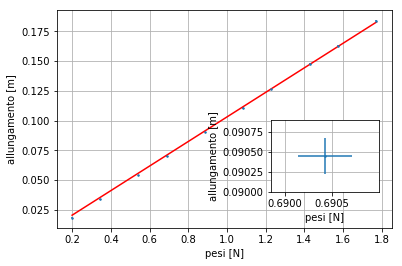

Chi quadrato per k modello e k osservato: 269.252648.
Test del chi quadro non superato!
23.589351 1.734933


In [4]:
def func(x,m):
    return m*x

popt,pcov = curve_fit(func, p1[1:], deltaZ1_1avg, sigma=deltaZ1_1err)

# Plottiamo i dati del caso statico 
fig1 = plt.figure()
plt.errorbar(p1[1:], deltaZ1_1avg, xerr=dweight, yerr=deltaZ1_1err, fmt=' ', marker='.', ms=3, capsize=0)
plt.plot(p1[1:],func(p1[1:], *popt), 'r-')
plt.xlabel('pesi [N]')
plt.ylabel('allungamento [m]')
plt.grid()
sub_axes = plt.axes([.62, .25, .25, .25])
sub_axes.grid()
sub_axes.errorbar(p1[4], deltaZ1_1avg[4], xerr=dweight, yerr=deltaZ1_1err[4], fmt=' ', marker='.', ms=3, capsize=0)
sub_axes.set_xlim([p1[4]-2*dweight, p1[4]+2*dweight])
sub_axes.set_ylim([deltaZ1_1avg[4]-2*deltaZ1_1err[4], deltaZ1_1avg[4]+2*deltaZ1_1err[4]])
sub_axes.set_xlabel('pesi [N]')
sub_axes.set_ylabel('allungamento [m]')
tikz_save('fig1.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.savefig('fig1.pdf')
plt.show()

# Faccio il test del chi quadro sui quantili 0.1-0.9
chi2k0 = mychisq(func(p1[1:],*popt), deltaZ1_1avg, deltaZ1_1err)
print('Chi quadrato per k modello e k osservato: %f.' % chi2k0 )
if (chi2k0 < chi2.isf(q=0.01, df=9)) & (chi2k0 > (chi2.isf(q=0.99, df=9))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

print('%f %f'% (chi2.isf(q=0.005, df=9), chi2.isf(q=0.995, df=9)))

#dweightrel = dweight/p1[1:]
#dlongrel = deltaZ1_1err/deltaZ1_1avg
#Rel1 = pd.DataFrame([dweightrel, dlongrel, dweightrel/dlongrel])
#with open('tablerel1.tex','w') as tf:
#    tf.write(Rel1.to_latex())

**Attenzione!!** Il test del chi quadro qua eseguito in realtà è fatto sul modello $y=mx+q$ e non $y=mx$. Fatto sulla legge $y=mx$ i nostri risultati *non* superano il test del chi quadro. Nonostante ciò, con buona approssimazione la legge è lineare. Andrebbe verificata la compatibilità della $k$ computata attraverso il fit lineare con quella calcolata con la media pesata...

In [5]:
# z0 non lo devo considerare
k1 = p1[1:]/deltaZ1_1avg
k1err = k1 * np.sqrt(np.power(dweight/p1[1:],2) + np.power(deltaZ1_1err/deltaZ1_1avg,2))

#tabellabella = pd.DataFrame({'Pi': p1[1:], 'sigmaPi': dweight, 'xi': deltaZ1_1avg, 'sigmaxi': deltaZ1_1err, 'ki': k1, 'sigmaki': k1err})
#tabellabella = tabellabella.round({'Pi': 4, 'sigmaPi': 4, 'xi': 4, 'sigmaxi': 4, 'ki': 2, 'sigmaki': 2})
#tabellabella = tabellabella[['Pi', 'sigmaPi', 'xi', 'sigmaxi', 'ki', 'sigmaki']]
#with open('tabellabella.tex','w') as tf:
#    tf.write(tabellabella.to_latex())

# Calcolo la media pesata sui valori di k 
wk1 = 1/np.power(k1err, 2)
DeltaWk1 = (sum(wk1)) * (sum(wk1*np.power(p1[1:],2))) - np.power(sum(wk1*p1[1:]),2)
k0 = np.average(k1, weights = wk1)
k0err = 1/np.sqrt(sum(wk1))
print('Il valore di k calcolato con la media pesata è (%.3f +- %.3f ) N/m.' % (k0, k0err))

# Calcolo la media campionaria
k0_m = np.mean(k1)
sigmak0_m = np.std(k1)
print('La media campionaria è %.1f N/m e l\'errore associato è %.1f N/m.' % (k0_m, sigmak0_m))

# Calcolo invece k a partire dalla regressione lineare
k0_1 = 1/popt[0]
k0_1errM = np.sqrt(sum(wk1*np.power(p1[1:],2)/DeltaWk1))
k0_1errQ = np.sqrt(sum(wk1) / DeltaWk1)
print('Il valore di k calcolato con la regressione lineare è (%.3f +- %.3f) N/m.' % (k0_1, k0_1errM))

Il valore di k calcolato con la media pesata è (9.705 +- 0.007 ) N/m.
La media campionaria è 9.9 N/m e l'errore associato è 0.3 N/m.
Il valore di k calcolato con la regressione lineare è (9.709 +- 0.025) N/m.


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


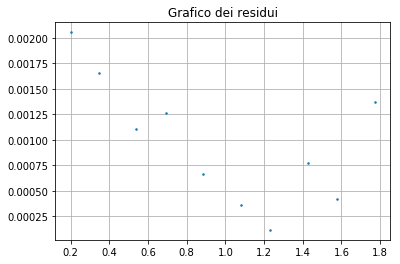

L'intercetta del fit è (0.10 +- 0.03) m


In [6]:
# Plot dei residui tra fit e dati
r1 = abs(func(p1[1:],*popt) - deltaZ1_1avg)
#display(r1)
fig2 = plt.figure()
plt.grid()
plt.title('Grafico dei residui')
plt.errorbar(p1[1:], r1, fmt=' ', marker='.', ms=3, capsize=0)
tikz_save('fig2.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()

print('L\'intercetta del fit è (%.2f +- %.2f) m' % (popt[0], k0_1errM))

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


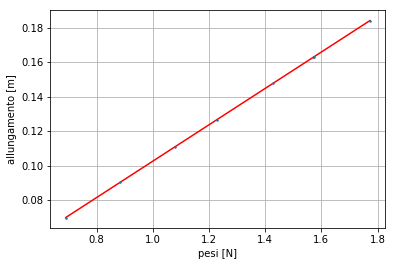

Il valore di k calcolato con la media pesata tolti i dati associati al pretensionamento è (9.484 +- 0.007 ) N/m.
Chi quadrato per k modello e k osservato: 2.705063.
Test del chi quadro superato!
Il quantile 0.005 è 0.411742 e quello 0.995 è 16.749602
Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


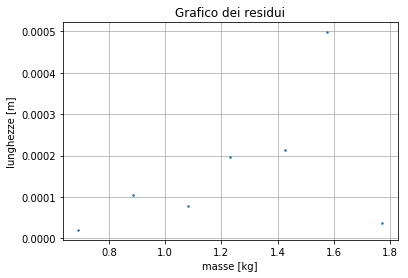

9.484 +- 0.007 N/m


In [7]:
# Plot togliendo i dati relativi al pretensionamento 
def func1(x,m,q):
    return m*x + q

p1_2 = p1[4:]
deltaZ1_2 = deltaZ1_1avg[3:]
popt2,pcov2 = curve_fit(func1, p1_2, deltaZ1_2, sigma=deltaZ1_1err[3:])

fig3 = plt.figure()
plt.errorbar(p1_2, deltaZ1_2, xerr=dweight, yerr=deltaZ1_1err[3:], fmt=' ', marker='.', ms=3, capsize=0)
plt.plot(p1_2,func1(p1_2, *popt2), 'r-')
plt.xlabel('pesi [N]')
plt.ylabel('allungamento [m]')
plt.grid()
#sub_axes = plt.axes([.62, .25, .25, .25])
#sub_axes.grid()
#sub_axes.errorbar(p1[4], deltaZ1_2, xerr=dweight, yerr=deltaZ1_1err[4], fmt=' ', marker='.', ms=3, capsize=0)
#sub_axes.set_xlim([p1[4]-2*dweight, p1[4]+2*dweight])
#sub_axes.set_ylim([deltaZ1_2[4]-2*deltaZ1_1err[4], deltaZ1_2[4]+2*deltaZ1_1err[4]])
tikz_save('fig3.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()

# z0 non lo devo considerare
k1_2 = p1[4:]/deltaZ1_2
k1_2err = k1_2 * np.sqrt(np.power(dweight/p1[4:],2) + np.power(deltaZ1_1err[3:]/deltaZ1_2,2))

# Calcolo la media pesata sui valori di k 
wk1_2 = 1/np.power(k1_2err, 2)
DeltaWk1_2 = (sum(wk1_2)) * (sum(wk1_2*np.power(p1[4:],2))) - np.power(sum(wk1_2*p1[4:]),2)
k0_2err = 1/np.sqrt(sum(wk1_2))
k0_2 = np.average(k1_2, weights = wk1_2)

k0_2 = 1/popt2[0]
print('Il valore di k calcolato con la media pesata tolti i dati associati al pretensionamento è (%.3f +- %.3f ) N/m.' % (k0_2, k0_2err))

# faccio chiquadro sul fit
chi2k0_2 = mychisq(func1(p1_2,*popt2), deltaZ1_2, deltaZ1_1err[3:])
print('Chi quadrato per k modello e k osservato: %f.' % chi2k0_2 )
if (chi2k0_2 < chi2.isf(q=0.005, df=5)) & (chi2k0_2 > (chi2.isf(q=0.995, df=5))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

print('Il quantile 0.005 è %f e quello 0.995 è %f' % (chi2.isf(q=0.995, df=5), chi2.isf(q=0.005, df=5)))

# Plot dei residui tra fit e dati
r1_2 = abs(func1(p1_2,*popt2) - deltaZ1_2)
#display(r1_2)
fig4 = plt.figure()
plt.grid()
plt.title('Grafico dei residui')
plt.xlabel('masse [kg]')
plt.ylabel('lunghezze [m]')
plt.errorbar(p1_2, r1_2, fmt=' ', marker='.', ms=3, capsize=0)
tikz_save('fig4.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()
print('%.3f +- %.3f N/m' % (k0_2, k0_2err))

In [8]:
# Studio la media campionaria
campavg_k0 = p1_2 / deltaZ1_2
campavg_k0
campstd_k0 = np.std(p1_2 / deltaZ1_2)
for ii in range(0,np.size(campavg_k0)):
    print('Il valore di k%i è (%f +- %f) N/m.' % (ii, campavg_k0[ii], campstd_k0))

Il valore di k0 è (9.884321 +- 0.078072) N/m.
Il valore di k1 è (9.779994 +- 0.078072) N/m.
Il valore di k2 è (9.740806 +- 0.078072) N/m.
Il valore di k3 è (9.717980 +- 0.078072) N/m.
Il valore di k4 è (9.657854 +- 0.078072) N/m.
Il valore di k5 è (9.683494 +- 0.078072) N/m.
Il valore di k6 è (9.636542 +- 0.078072) N/m.


Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


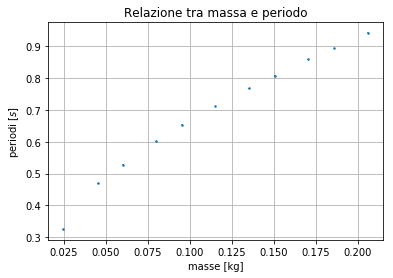

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


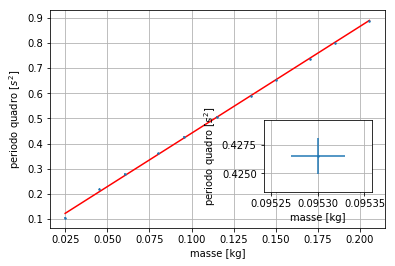

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


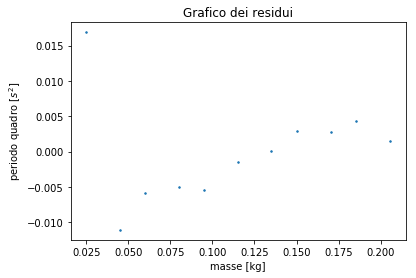

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


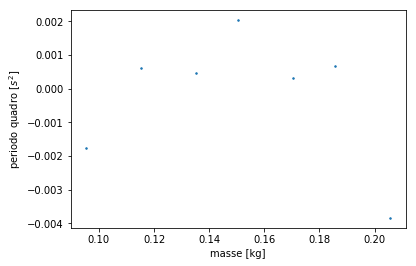

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


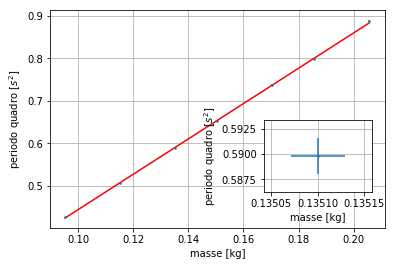

Chi quadrato per k modello e k osservato: 354.072726.
Test del chi quadro non superato!
23.589351 1.734933
Chi quadrato per k modello e k osservato (senza i primi quattro dati): 6.152210.
Test del chi quadro superato!
16.749602 0.411742


t0    t1    t2    t3    t4    t5    t6    t7    t8    t9   t10
0  3.22  4.61  5.25  6.05  6.49  7.17  7.66  8.10  8.59  8.93  9.41
1  3.30  4.73  5.22  6.01  6.52  7.14  7.68  8.03  8.56  8.91  9.37
2  3.26  4.68  5.24  5.99  6.56  7.13  7.66  8.13  8.59  8.99  9.44
3  3.27  4.67  5.30  5.97  6.50  7.13  7.70  8.06  8.56  8.95  9.51
4  3.29  4.68  5.30  5.98  6.53  7.09  7.71  8.08  8.52  8.92  9.41
5  3.10  4.69  5.20  6.07  6.46  7.14  7.68  8.08  8.60  8.91  9.40
6  3.27  4.75  5.28  5.99  6.58  7.13  7.67  8.09  8.59  8.93  9.42
7  3.29  4.67  5.27  6.02  6.57  7.03  7.74  8.02  8.62  8.97  9.41
8  3.28  4.70  5.34  5.99  6.56  7.08  7.70  8.06  8.60  8.94  9.45
9  3.23  4.74  5.33  6.00  6.54  7.13  7.60  8.09  8.63  8.95  9.40

t0  t0_1  t0_2  t0_3    t1    t2    t3    t4    t5    t6    t7    t8  \
0  3.22  5.79  5.95  5.84  4.61  5.25  6.05  6.49  7.17  7.66  8.10  8.59   
1  3.30  5.82  5.94  5.81  4.73  5.22  6.01  6.52  7.14  7.68  8.03  8.56   
2  3.26  5.87  5.95  5.84  4.68  5.24  5.99  6.56  7.13  7.66  8.13  8.59   
3  3.27  5.88  5.88  5.76  4.67  5.30  5.97  6.50  7.13  7.70  8.06  8.56   
4  3.29  5.89  5.94  5.86  4.68  5.30  5.98  6.53  7.09  7.71  8.08  8.52   
5  3.10  5.84  5.84  5.70  4.69  5.20  6.07  6.46  7.14  7.68  8.08  8.60   
6  3.27  5.87  5.85  5.84  4.75  5.28  5.99  6.58  7.13  7.67  8.09  8.59   
7  3.29  5.84  5.90  5.79  4.67  5.27  6.02  6.57  7.03  7.74  8.02  8.62   
8  3.28  5.84  5.95  5.90  4.70  5.34  5.99  6.56  7.08  7.70  8.06  8.60   
9  3.23  5.91  5.93  5.78  4.74  5.33  6.00  6.54  7.13  7.60  8.09  8.63   

     t9   t10  
0  8.93  9.41  
1  8.91  9.37  
2  8.99  9.44  
3  8.95  9.51  
4  8.92  9.41  
5  8.91  9.40  
6  8.93  9.42  
7  8.97  9.41  
8  8.94  9.45  
9  8.95  9.40

In [9]:
# Ora studio la relazione tra massa e periodo e divido i periodi per 10
T1
T1_0 = T1.iloc[:,[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
T1_0avg = T1_0.mean()/10
T1_0var = T1_0.var()
T1_0err = np.sqrt(1/np.size(T1_0avg)*T1_0var + np.power(Dtime/np.sqrt(12),2))/10

# Plotto i dati con masse sulle ascisse e periodi sulle ordinate
fig5 = plt.figure()
plt.title('Relazione tra massa e periodo')
plt.grid()
plt.xlabel('masse [kg]')
plt.ylabel('periodi [$s$]')
plt.errorbar(m2,T1_0avg, xerr=dmass, yerr=T1_0err, fmt=' ', marker='.', ms=3, capsize=0)
tikz_save('fig5.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()

# Faccio il grafico dei residui con T^2 e la massa
#r5 = (func1(m2,*popt1) - T1_0avg)
#display(r1)
#fig8 = plt.figure()
#plt.grid()
#plt.title('Grafico dei residui')
#plt.xlabel('masse [kg]')
#plt.ylabel('periodo [$s$]')
#plt.errorbar(m2, r5, fmt=' ', marker='.', ms=3, capsize=0)
#tikz_save('fig8.tikz')
#plt.show()

# Ooops! Un grafico di una radice, che strano, proviamo ad elevare al quadrato...
T1_qavg = np.power(T1_0avg, 2)
T1_qerr = 2 * T1_0avg * T1_0err
popt1,pcov1 = curve_fit(func1, m2, T1_qavg, sigma=T1_qerr)
fig6 = plt.figure()
#plt.title('Relazione tra massa e quadrato del periodo')
plt.errorbar(m2, T1_qavg, xerr=dmass, yerr=T1_qerr, fmt=' ', marker='.', ms=3, capsize=0)
plt.plot(m2,func1(m2, *popt1), 'r-')
plt.xlabel('masse [kg]')
plt.ylabel('periodo quadro [$s^2$]')
plt.grid()
sub_axes1 = plt.axes([.62, .25, .25, .25])
sub_axes1.grid()
sub_axes1.errorbar(m2[4], T1_qavg[4], xerr=dmass, yerr=T1_qerr[4], fmt=' ', marker='.', ms=3, capsize=0)
sub_axes1.set_xlim([m2[4]-2*dmass, m2[4]+2*dmass])
sub_axes1.set_ylim([T1_qavg[4]-2*T1_qerr[4], T1_qavg[4]+2*T1_qerr[4]])
sub_axes1.set_xlabel('masse [kg]')
sub_axes1.set_ylabel('periodo quadro [$s^2$]')
tikz_save('fig6.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.savefig('fig6.pdf')
plt.show()

# Faccio il grafico dei residui con T^2 e la massa
r4 = (func1(m2,*popt1) - T1_qavg)
#display(r1)
fig8 = plt.figure()
plt.title('Grafico dei residui')
plt.xlabel('masse [kg]')
plt.ylabel('periodo quadro [$s^2$]')
plt.errorbar(m2, r4, fmt=' ', marker='.', ms=3, capsize=0)
tikz_save('fig8.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()


# Rifaccio il fit con meno dati
popt3,pcov3 = curve_fit(func1, m2[4:], T1_qavg[4:], sigma=T1_qerr[4:])

# Faccio il grafico dei residui con T^2 e la massa
r3 = (func1(m2[4:],*popt3) - T1_qavg[4:])
#display(r1)
fig7 = plt.figure()
#plt.title('Grafico dei residui')
plt.xlabel('masse [kg]')
plt.ylabel('periodo quadro [$s^2$]')
plt.errorbar(m2[4:], r3, fmt=' ', marker='.', ms=3, capsize=0)
tikz_save('fig7.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.show()

fig10 = plt.figure()
#plt.title('Relazione tra massa e quadrato del periodo')
plt.errorbar(m2[4:], T1_qavg[4:], xerr=dmass, yerr=T1_qerr[4:], fmt=' ', marker='.', ms=3, capsize=0)
plt.plot(m2[4:],func1(m2[4:], *popt3), 'r-')
plt.xlabel('masse [kg]')
plt.ylabel('periodo quadro [$s^2$]')
plt.grid()
sub_axes1 = plt.axes([.62, .25, .25, .25])
sub_axes1.grid()
sub_axes1.errorbar(m2[6], T1_qavg[6], xerr=dmass, yerr=T1_qerr[6], fmt=' ', marker='.', ms=3, capsize=0)
sub_axes1.set_xlim([m2[6]-2*dmass, m2[6]+2*dmass])
sub_axes1.set_ylim([T1_qavg[6]-2*T1_qerr[6], T1_qavg[6]+2*T1_qerr[6]])
sub_axes1.set_xlabel('masse [kg]')
sub_axes1.set_ylabel('periodo quadro [$s^2$]')
tikz_save('fig10.tikz',
    figureheight='\\figureheight',
    figurewidth='\\figurewidth')
plt.savefig('fig10.pdf')
plt.show()

# Faccio il test del chi quadro sui quantili 0-0.8
#print('Scelgo di non dare falso allarme per sottostima di incertezze... (è giusto?), quindi scelgo i quantili 0 e 0.8')
chi2kd1 = mychisq(func1(m2,*popt1), T1_qavg, T1_qerr)
print('Chi quadrato per k modello e k osservato: %f.' % chi2kd1)
if (chi2kd1 < chi2.isf(q=0.005, df=9)) & (chi2kd1 > (chi2.isf(q=0.995, df=9))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

print('%f %f' % (chi2.isf(q=0.005, df=9 ), chi2.isf(q=0.995, df=9)))
    
# Faccio il test del chi quadro sui quantili 0-0.8
#print('Scelgo di non dare falso allarme per sottostima di incertezze... (è giusto?), quindi scelgo i quantili 0 e 0.8')
chi2kd2 = mychisq(func1(m2[4:],*popt3), T1_qavg[4:], T1_qerr[4:])
print('Chi quadrato per k modello e k osservato (senza i primi quattro dati): %f.' % chi2kd2)
if (chi2kd2 < chi2.isf(q=0.005, df=5)) & (chi2kd2 > (chi2.isf(q=0.995, df=5))):
    print('Test del chi quadro superato!')
else:
    print('Test del chi quadro non superato!')

print('%f %f' % (chi2.isf(q=0.005, df=5 ), chi2.isf(q=0.995, df=5)))
    
display(T1_0)
display(T1)

#dmassrel = dmass/m2
#dtrel = T1_qerr/T1_qavg
#Rel2 = pd.DataFrame([dmassrel, dtrel, dmassrel/dtrel])
#with open('tablerel2.tex','w') as tf:
#    tf.write(Rel2.to_latex())

A questo punto ci manca da calcolare la massa efficace della molla (basta trovare il q della regressione, che è `popt[1]` se non vado errato) e modificare la equazione della relazione con la massa $M = m + m_e$. Inoltre vanno calcolate $C$ e $M_e$ delle misure dinamiche con la regressione lineare come indicato nel punto 2.4.12 della scheda. Conoscendo la legge, possiamo poi imporre $C=2\pi$ e trovare il valore di $k$. I valori di $k$ statico e dinamico sono compatibili?

In [10]:
# Calcolo la media pesata
wk2 = 1/np.power(T1_qerr, 2)
DeltaWk2 = (sum(wk2)) * (sum(wk2*np.power(m2,2))) - np.power(sum(wk2*m2),2)
T0err = 1/np.sqrt(sum(wk2))
T0 = np.average(T1_qavg, weights = wk2)
T0sqrterr = np.sqrt(T0) * 1/2 * T0err/T0
print('Il valore di T^2 calcolato con la media pesata è ( %.4f +- %.4f ) s.' % (T0, T0err))
print ('Il valore di T calcolato invece è ( %.4f +- %.4f ) s.' % (np.sqrt(T0), T0sqrterr))
B = popt1[0]
A = popt1[1]
errA = np.sqrt(sum(wk2*np.power(m2,2)/DeltaWk2))
errB = np.sqrt(sum(wk2) / DeltaWk2)
# Calocolo della massa efficace della molla e della costante C presente nella relazione T = C * sqrt(m/k) k è
#della regressione lineare
C = np.sqrt(B * k0_1)

argC = B * k0_1
argerrC = np.sqrt((np.power(errB/B, 2) + np.power(k0_1errM/k0_1, 2))) * (B * k0_1)
errC = C * 1/2 * argerrC/argC

print('Il valore di C è %.2f +- %.2f.' % (C, errC))

# Calcolo il valore di m_e
m_e = (A * k0_1) / np.power(C, 2)
err_Ak0_1 = np.sqrt(np.power(errA/A, 2) + np.power(k0_1errM/k0_1, 2)) * (A * k0_1)
errCq = (2 * np.power(C, 2)* errC/C)
err_m_e = np.sqrt(np.power(err_Ak0_1/(A * k0_1), 2) + np.power(errCq/ np.power(C, 2), 2)) * m_e
print('Il valore della massa efficace della molla è (%.4f +- %.4f) kg. ' % (m_e, err_m_e))

Il valore di T^2 calcolato con la media pesata è ( 0.4332 +- 0.0004 ) s.
Il valore di T calcolato invece è ( 0.6582 +- 0.0003 ) s.
Il valore di C è 6.42 +- 0.01.
Il valore della massa efficace della molla è (0.0040 +- 0.0002) kg. 


In [11]:
# Determinare il valore di k dinamico
Mtot = m2 + m_e 
Mtoterr = np.sqrt(np.power(dweight, 2) + np.power(err_m_e, 2))
kd = (4 * mt.pi**2 * Mtot)/ T1_qavg
display(kd)

# Media pesata sui valori di k elastico 
kderr = (4 * mt.pi**2 ) * (np.power(Mtoterr/Mtot, 2) + np.power(T1_qerr/T1_qavg, 2)) * kd
wkd = 1 / np.power(kderr, 2)

kd0 = np.average(kd, weights = wkd) 
kd0err = 1/np.sqrt(sum(wkd))

# Media pesata senza i primi 4 dati
kd1 = (4 * mt.pi**2 * Mtot[4:])/ T1_qavg[4:]
kd1err = (4 * mt.pi**2 ) * (np.power(Mtoterr/Mtot[4:], 2) + np.power(T1_qerr[4:]/T1_qavg[4:], 2)) * kd1
wkd1 = 1 / np.power(kd1err, 2)
kd0_1 = np.average(kd1, weights = wkd1)
kd0_1err = 1/np.sqrt(sum(wkd1))

print('Il valore di k calcolato tramite la media pesata è (%.3f +- %.3f) N/m.' % (kd0, kd0err))
print('Il valore di k calcolato tramite la media pesata è (%.3f +- %.3f) N/m.' % (kd0_1, kd0_1err))

t0     10.796054
t1      8.841276
t2      9.115865
t3      9.179535
t4      9.190977
t5      9.282984
t6      9.310501
t7      9.350553
t8      9.345021
t9      9.360525
t10     9.325619
dtype: float64

Il valore di k calcolato tramite la media pesata è (9.333 +- 0.002) N/m.
Il valore di k calcolato tramite la media pesata è (9.338 +- 0.002) N/m.


In [12]:
# Compatibilità dei due valori di k, dinamico e statico 
Rk = kd0_1 - k0_2
print('Le mie misure sono kd = (%.3f +- %.3f) N/m e ks = (%.3f +- %.3f) N/m' % (kd0_1, kd0_1err, k0_2, k0_2err))
sigmaRk = np.sqrt(k0_2err**2 + kd0_1err**2) 
print('Il residuo tra i due valori di k è (%.3f +- %.3f) N/m.' % (Rk, sigmaRk))
if (0 < (Rk + 3* sigmaRk)) & (0 > (Rk - 3* sigmaRk)):
    print('Torna!')
else:
    print('Non torna!')

display(abs(Rk/kd0_1))
display(abs(Rk/k0_2))

Le mie misure sono kd = (9.338 +- 0.002) N/m e ks = (9.484 +- 0.007) N/m
Il residuo tra i due valori di k è (-0.145 +- 0.007) N/m.
Non torna!


0.015544613023987488

0.01530667665864554